In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

from numbers_parser import Document
from os import path as path
import collections

import Dumbleplot as dp

#### Cast: Give path to file and filename:

In [40]:
pathtofile = "/Users/scibook/Eigen/PhD/Experiments/LLPS/20240425 cell extract spin column concentration/Data"
filename = "flow-through.numbers"

#### Cast: Give information how your data is organised:

In [41]:
data_organised_in_rows_or_columns = "columns"

# rows:
# x, ... , xn
# y1, ... , y1n
# y2, ... , y2n

# columns:
# x, y1, y2
# ... , .., ..
# xn, y1n, y2n

In [42]:
# only relevant to change for .numbers-files!
# trigger anyways
# string or int
get_data_from_sheet= "Sheet 1"
table = "Amicon Ultra 3k" 
data_in_head = False  # only relevant for xdata stored in the first row. If so, set to True 

#### Import Data

In [43]:
spellbook = dp.DataImport(pathtofile, filename)
spellbook.import_data(get_data_from_sheet, table)
spellbook.df
x_data = ["min"]
y_data = ["flow-through"]
until_column = 4

,min,flow-through,None,None,None,None,None
0,1.0,20.0,None,None,None,None,None
1,5.0,125.0,None,None,None,None,None
2,6.0,138.0,None,None,None,None,None
3,7.0,146.5,None,None,None,None,None
4,8.0,156.0,None,None,None,None,None
5,NaN,NaN,None,None,None,None,None
6,NaN,NaN,None,None,None,None,None
7,NaN,NaN,None,None,None,None,None
8,NaN,NaN,None,None,None,None,None
9,NaN,NaN,None,None,None,None,None


#### Cast: Give information where to find your data:

In [44]:
first_cell = 0, "min"  # row, column
last_cell = 4, "flow-through"

#### Display data selection

In [45]:
spells = dp.Data(data_organised_in_rows_or_columns) 
spells.get_data(spellbook.df, first_cell, last_cell)
spells.data_table

,min,flow-through
0,1.0,20.0
1,5.0,125.0
2,6.0,138.0
3,7.0,146.5
4,8.0,156.0


#### Cast: select which data should be display

In [46]:
# select y-data
# ["name1", "name2", ...] or [idx, idx, ...]
y_data = [
    "flow-through"
]

In [47]:
# select x-data
# ["name1"] or [idx]
# can take multiple inputs, but then every y-data needs one specified x-data. Plotting happens in the order the data is provided.
x_data = [
    "min"
]

In [48]:
# select errorbar values
# if no errorbars are desired, set to None
# ["name1", "name2", ...]
# can take multiple inputs, but then every y-data needs one specified x-data. Plotting happens in the order the data is provided.
errorbars = [
    None
]

#### Does Data magic

In [49]:
# set idx to True if you have enter idx values for x- or y-data
spells.make_dict(y_data, spellbook.ext, first_cell, idx=False)
spells.get_xdata(data_in_head, x_data, idx=False)
spells.delete_nans()
spells.get_errorbar(errorbars)

added column: flow-through


#### Cast: specify plot properties of each dataset

In [56]:
n=1

In [57]:
# copy for each dataset you want to display
spells.ydata[n]["marker"] = "o"  # alternatives: "x", "^", "v", "s", "o"
spells.ydata[n]["linestyle"] = "solid"  # alternatives: "solid", "dotted", "dashdot", "dashed" or "" for no line
spells.ydata[n]["color"] = None  # "None" for default colors, alternative: hexcolors or names (hence "green")
spells.ydata[n]["regression"] = False  # None for no regression, "True" for linear regression

n += 1  # do not change

In [21]:
for n in range(6, 11):
    # copy for each dataset you want to display
    spells.ydata[n]["marker"] = "s"  # alternatives: "x", "^", "v", "s", "o"
    spells.ydata[n]["linestyle"] = "solid"  # alternatives: "solid", "dotted", "dashdot", "dashed" or "" for no line
    spells.ydata[n]["color"] = None  # "None" for default colors, alternative: hexcolors or names (hence "green")
    spells.ydata[n]["regression"] = False  # None for no regression, "True" for linear regression

#n += 1  # do not change

#### Cast: specify the properties of the general plot

In [58]:
# specify the properties of the general plot
plot_properties = {
    "figname" : "flow-through",
    "formats" : ["png", "svg"],  # "svg", "png", "jpeg", "bmp"
    "xlabel" : "centrifugation time [min]",
    "ylabel" : "flow-through [µL]",
    "x-range" : [None, None],  # [None, None] for default, otherwise [startvalue, endvalue]
    "y-range" : [None, None],  
    "x-ticks" : None,  # specify number of labeld major ticks on each axis, None is automode
    "y-ticks" : None,
    "x-minor" : 2,  # specify number of minor ticks between major ticks, 2 or 5 is best, None is automode
    "y-minor" : 2,
    "xaxis-type": "lin",  # can be set to "lin" or "log"
    "yaxis-type": "lin",
    "fontsizefactor" : 1.2
}

#### Accio Plot

In [59]:
hp = dp.Plotter(plot_properties)
hp.set_limits()
hp.set_major_ticks()

Accio plot!
｡ﾟ.
(｀･ᴗ･)━☆ﾟ･ﾟ:*❤
*｡ﾟ
 . 


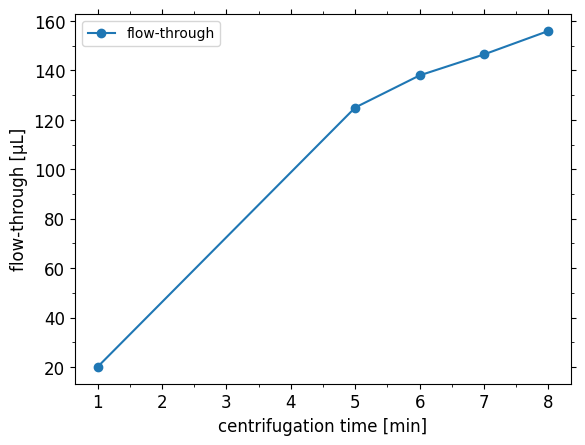

In [60]:
# main plot; all in one
hp.cast_magic()

fig = plt.figure()
ax = fig.add_subplot(111)

# plot datasets
for data in spells.ydata:
    dataset = spells.ydata[data]
    ax.errorbar(dataset["xdata"], dataset["data"], xerr=None, yerr=dataset["error"], capsize=5,
                marker = dataset["marker"], linestyle = dataset["linestyle"], color = dataset["color"], label = dataset["name"])

    # check for regression
    if dataset["regression"] is True:
        reg = dp.Regression()
        xdf = pd.DataFrame(dataset["xdata"]) #xdf was originally dataset["xdata"] and this line was not here
        ydf = pd.DataFrame(dataset["data"]) # problem is only because delete_nans generates list, but if they are changed to df, some more errors occure. URGENT
        y_pred, m, c = reg.linreg(xdf.values.reshape(-1, 1), ydf.values, dataset["name"], do_linreg = True)
        ax.plot(xdf, y_pred, color = dataset["color"]) # xdf = spells.ydata[0]["xdata"]


# adjust plot
ax.set_xlabel(hp.pp["xlabel"])
ax.set_ylabel(hp.pp["ylabel"])
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.set_xlim(hp.pp["x-range"])
ax.set_ylim(hp.pp["y-range"])

xt, yt = hp.set_lin_log()
ax.set_xscale(xt)
ax.set_yscale(yt)

if hp.pp["xtick_number"] is not None:
    ax.xaxis.set_major_locator(hp.pp["xtick_number"])
if hp.pp["ytick_number"] is not None:
    ax.yaxis.set_major_locator(hp.pp["ytick_number"])

xminor, yminor = hp.minor_locator()
if hp.pp["xaxis-type"] != "log":
    ax.xaxis.set_minor_locator(AutoMinorLocator(xminor))
if hp.pp["yaxis-type"] != "log":
    ax.yaxis.set_minor_locator(AutoMinorLocator(yminor))

ax.yaxis.label.set_size(10*hp.pp["fontsizefactor"])
ax.xaxis.label.set_size(10*hp.pp["fontsizefactor"])
ax.tick_params(axis="x", labelsize = 10*hp.pp["fontsizefactor"])
ax.tick_params(axis="y", labelsize = 10*hp.pp["fontsizefactor"])


##############
#Add user defined stuff here
#ax.axvline(x=375, label="Emission 375 nm", color="red")
#ax.axvspan(370, 380, alpha=0.2, color='red')
##############



legend = ax.legend()

#### Save figure

In [61]:
savepath = path.join(pathtofile, plot_properties["figname"])
for file_format in plot_properties["formats"]:
    fig.savefig(savepath + '.%s' % file_format, dpi=600, format=file_format)

In [ ]:
# secondary plot, indivual datasets